#**IMPORT LIBRARY**

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans

#**READ DATA**

In [72]:
data = pd.read_csv("Data.csv")

In [73]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [74]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


#**MENGHAPUS KOLOM COUNTRY**

In [75]:
x=data.drop(['country'],axis=1).values

#**ALGORITMA K-MEANS CLUSTERING**

In [76]:
model = KMeans(n_clusters=3)

In [77]:
points = data[['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']]

In [78]:
model.fit(points)

KMeans(n_clusters=3)

In [79]:
cluster_array = model.labels_

In [80]:
cluster_array

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#**VISUALISASI**

In [81]:
data['Cluster']=cluster_array

In [82]:
X = points[['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']]
Y = data['Cluster']

In [83]:
centroid = model.cluster_centers_

In [84]:
centroid

array([[8.73428571e+00, 5.52400000e+01, 8.49028571e+00, 4.87171429e+01,
        4.09085714e+04, 3.88914286e+00, 7.91714286e+01, 1.92657143e+00,
        3.59771429e+04],
       [4.73898437e+01, 3.58656172e+01, 6.33203125e+00, 4.59216086e+01,
        8.56924219e+03, 8.95764844e+00, 6.78734375e+01, 3.26335938e+00,
        4.43839063e+03],
       [4.87500000e+00, 8.52500000e+01, 7.64000000e+00, 6.19000000e+01,
        8.36250000e+04, 4.21675000e+00, 8.10000000e+01, 1.79250000e+00,
        8.44250000e+04]])

In [85]:
#untuk meletakkan centroid
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [86]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,8.734286
1,47.389844
2,4.875000


In [87]:
crt_Y = pd.DataFrame(centroid_Y)
crt_Y.head()

,0
0,55.240000
1,35.865617
2,85.250000


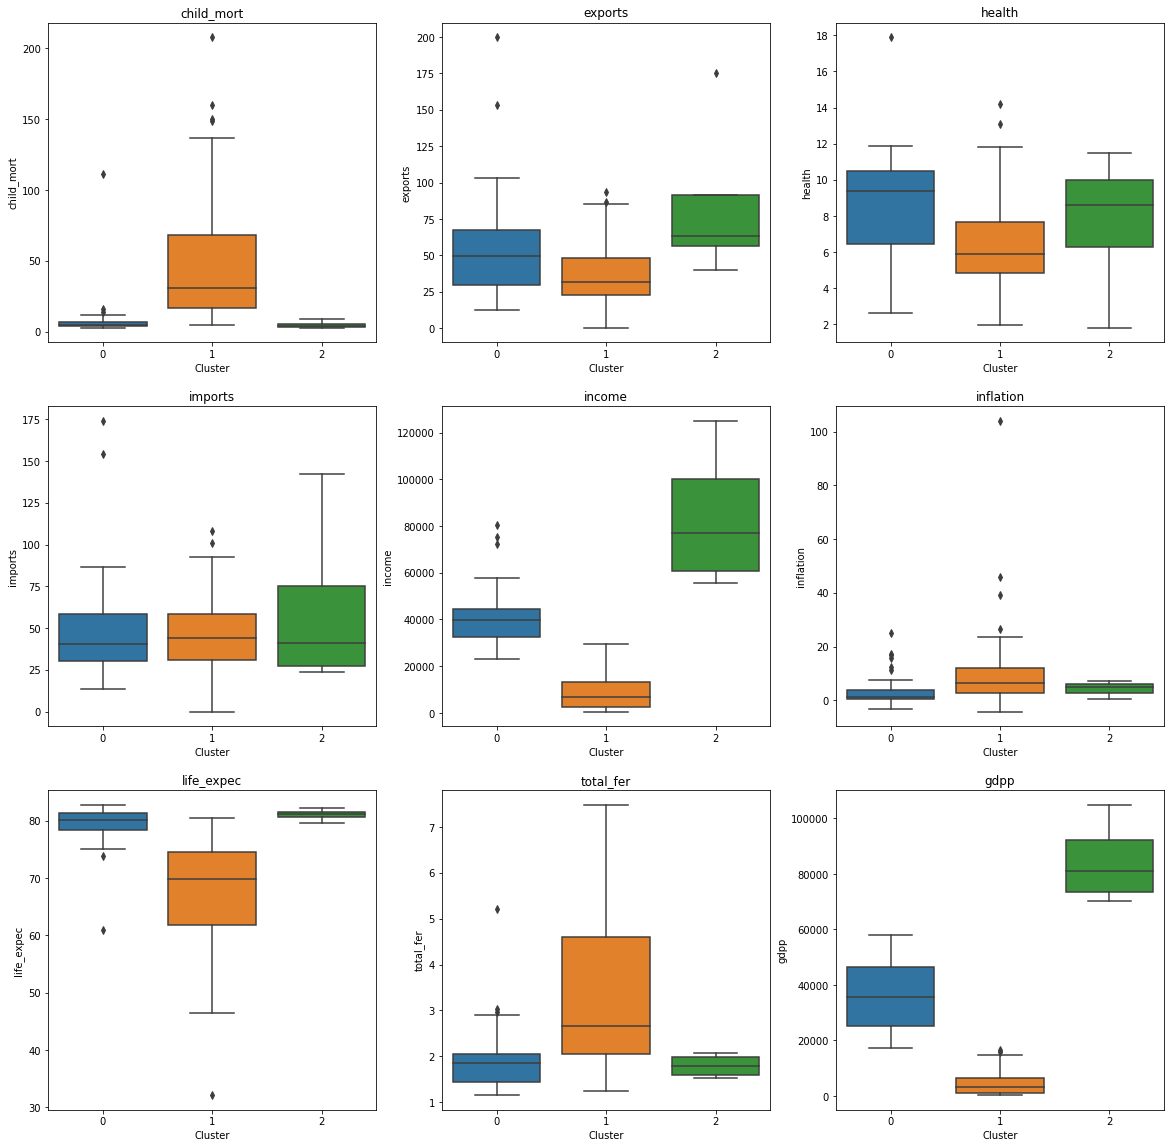

In [88]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data.Cluster,data[l[i]])
    plt.title(l[i])

**Kesimpulan**

1.   Grafik antara Cluster dan child_mort menunjukkan jumlah kematian yang lebih besar (berkisar antara 20 hingga 70) anak di bawah 5 tahun pada cluster no 0 (mungkin karena masalah kesehatan) yang lebih banyak dibandingkan dengan cluster 1 dan 2.
2.   Grafik antara Cluster dan ekspor menunjukkan bahwa ekspor di cluster 0 lebih kecil dari 24 hingga 50 yang lebih kecil dibandingkan dengan cluster 1 dan 2.
3.   Grafik antara Klaster dan kesehatan menunjukkan bahwa pengeluaran untuk kesehatan di Klaster 0 lebih sedikit dibandingkan dengan klaster 1 dan 2.
4.   Grafik antara Cluster dan pendapatan menunjukkan bahwa rentang pendapatan di Cluster 0 lebih kecil dibandingkan dengan Cluster 1 dan 2.
3.   Ada lebih banyak inflasi di cluster 0.
4.   life_expec range kurang di cluster 0.
3.   Grafik antara Cluster dan total_fer menunjukkan bahwa 
4.   populasi meningkat pesat di cluster 0
4.   GDPP lebih sedikit di Cluster 0.

#**METODE ELBOW**

In [89]:
#titik paling tajam itu titik paling optimal
cluster_range = range(1,11)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

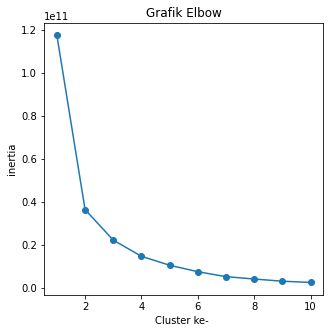

In [90]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.title('Grafik Elbow')
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()